# Adaptive Tit-for-Tat Strategy Demo

This notebook demonstrates the behavior of the adaptive GTFT strategy implemented in `src/strategy.py`.

In [1]:
# Add src to path so we can import strategy.py
import sys
import os

src_path = os.path.abspath("src")
if src_path not in sys.path:
    sys.path.append(src_path)

In [2]:
# Import the strategy function
from strategy import strategy

### Define a function to simulate a match

In [3]:
def simulate_match(opponent_strategy, rounds=200):
    my_history = []
    opponent_history = []

    for _ in range(rounds):
        my_move = strategy(my_history, opponent_history)
        opponent_move = opponent_strategy(my_history, opponent_history)

        my_history.append(my_move)
        opponent_history.append(opponent_move)

    return my_history, opponent_history

### Define some basic opponents

In [4]:
def always_cooperate(_, __):
    return 'cooperate'

def always_defect(_, __):
    return 'defect'

def tit_for_tat(_, opponent_history):
    if not opponent_history:
        return 'cooperate'
    return opponent_history[-1]

import random
def random_player(_, __):
    return random.choice(['cooperate', 'defect'])

### Run and plot results

In [5]:
import matplotlib.pyplot as plt

def plot_match(my_history, opponent_history, title):
    mapping = {'cooperate': 1, 'defect': 0}
    my_moves = [mapping[m] for m in my_history]
    opp_moves = [mapping[m] for m in opponent_history]

    plt.figure(figsize=(12, 2))
    plt.plot(my_moves, label='My Strategy', drawstyle='steps-post')
    plt.plot(opp_moves, label='Opponent', drawstyle='steps-post')
    plt.title(title)
    plt.yticks([0, 1], ['Defect', 'Cooperate'])
    plt.legend()
    plt.grid(True)
    plt.show()

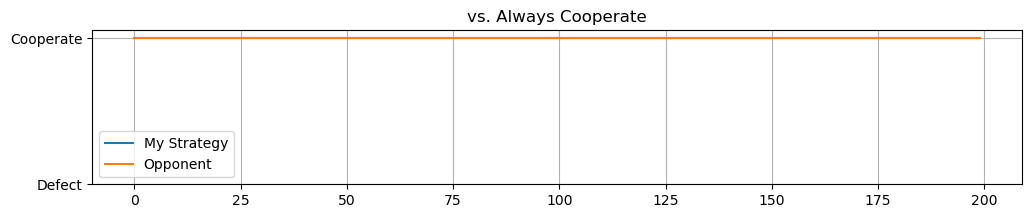

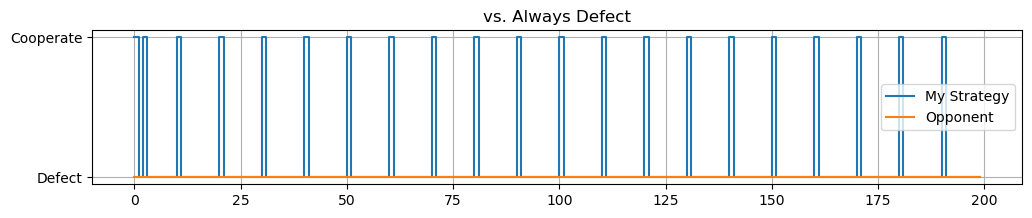

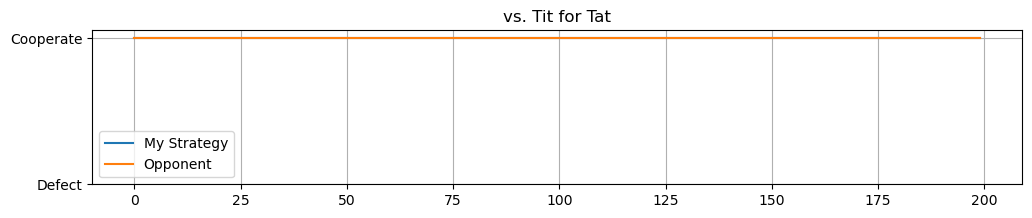

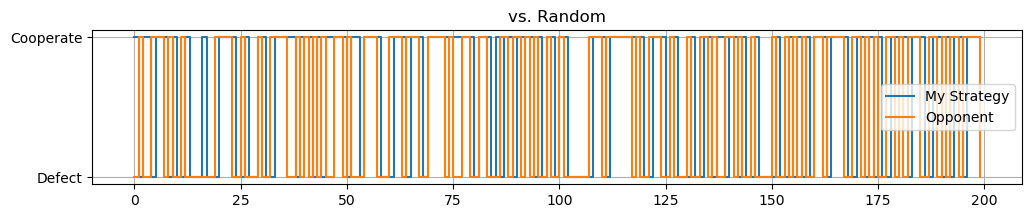

In [6]:
# Simulate against different opponents
opponents = {
    "Always Cooperate": always_cooperate,
    "Always Defect": always_defect,
    "Tit for Tat": tit_for_tat,
    "Random": random_player,
}

for name, opponent_func in opponents.items():
    my_hist, opp_hist = simulate_match(opponent_func)
    plot_match(my_hist, opp_hist, title=f"vs. {name}")